<a href="https://colab.research.google.com/github/harangji/google_colab/blob/main/orange3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as dp
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
titanic = dp.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/titanic_train.csv")

Mounted at /content/drive


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#생존 상황
#여러개의 그래프를 한번에 표현 : subplots

Text(0.5, 1.0, 'Count Plot_survived')

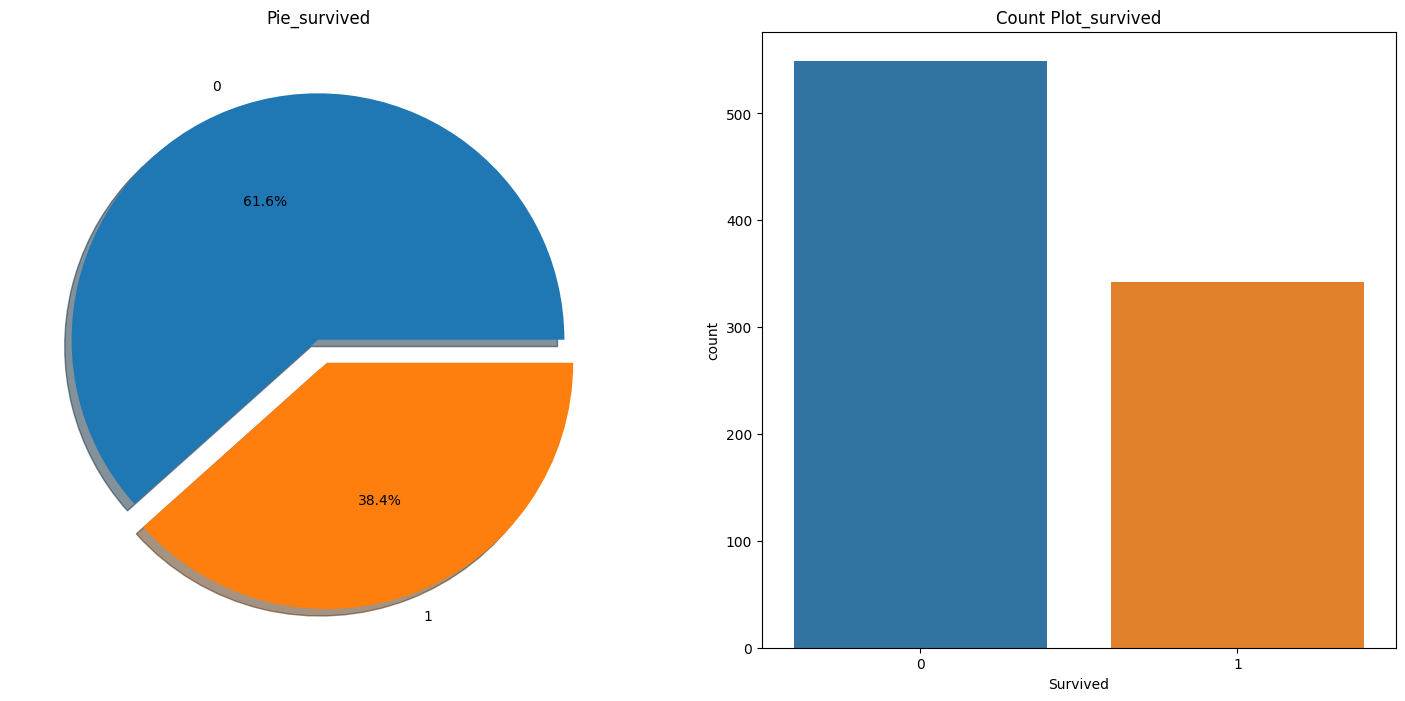

In [ ]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
titanic ['Survived'].value_counts().plot.pie(ax = ax[0], autopct = "%1.1f%%", shadow = True, explode = [0, 0.1])

ax[0].set_title("Pie_survived")
ax[0].set_ylabel("")

sns.countplot( x = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Count Plot_survived")

#사망률이 2배정도 높다

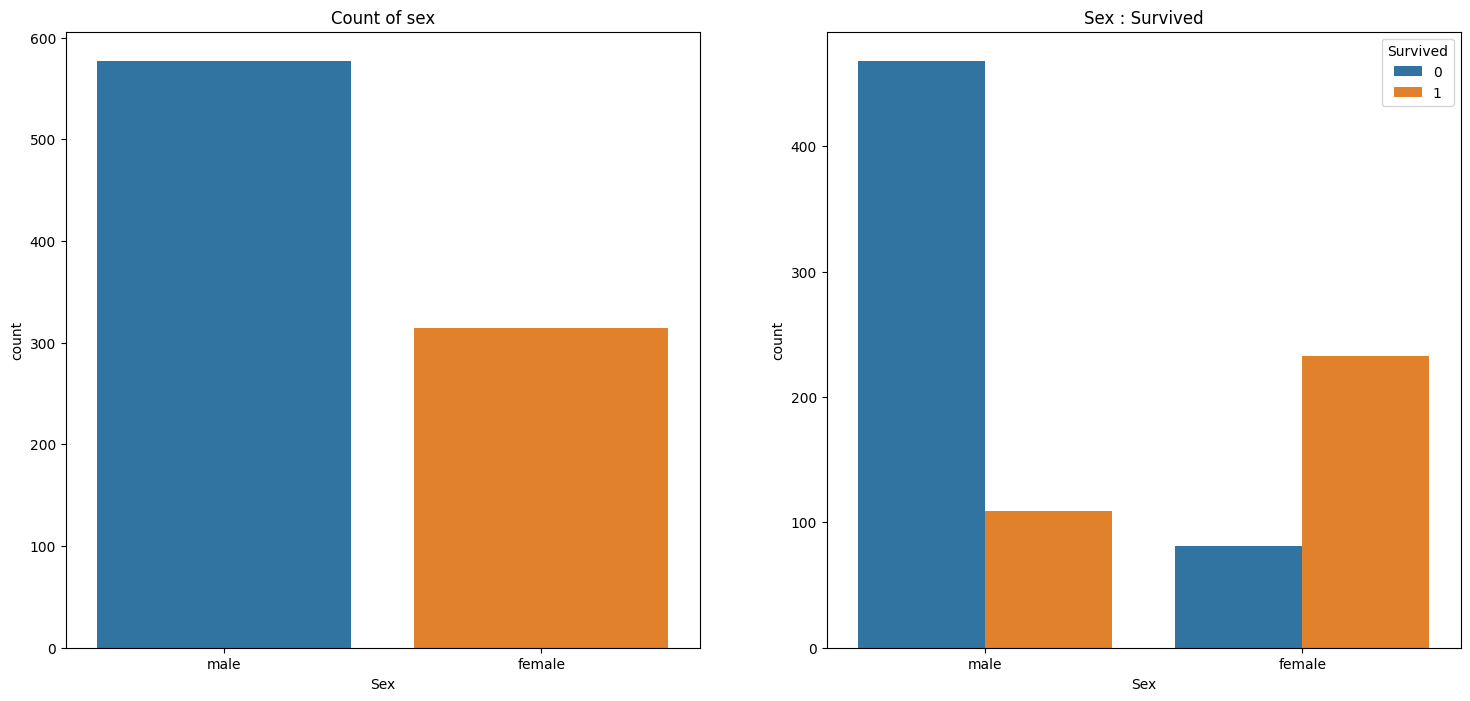

In [ ]:
f, ax = plt.subplots(1,2,figsize = (18, 8))

sns.countplot( x = "Sex", data = titanic, ax = ax[0])
ax[0].set_title("Count of sex")

sns.countplot(x = "Sex", data =titanic, hue = "Survived", ax = ax[1])
ax[1].set_title("Sex : Survived")

plt.show();

#성별에 따른 생존율 분석 결과
#여성 생존 인원의 2배가량의 남성 승객이 사망했다
#남성 승객의 생존 가능성이 낮다

#경제력에 따른 생존율
#사망 : 0, 생존: 1

#crosstab : 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용

In [ ]:
dp.crosstab(titanic["Pclass"], titanic["Survived"], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#1등실의 생존 가능성이 높다
#1. 여성의 생존율이 높았으므로 1등실에 여성이 많이 타고있었는지에 대한 분석이 필요
#2. 3등실에 남성이 많이 있었는지 분석이 필요

#객실별 남성 여성 분포


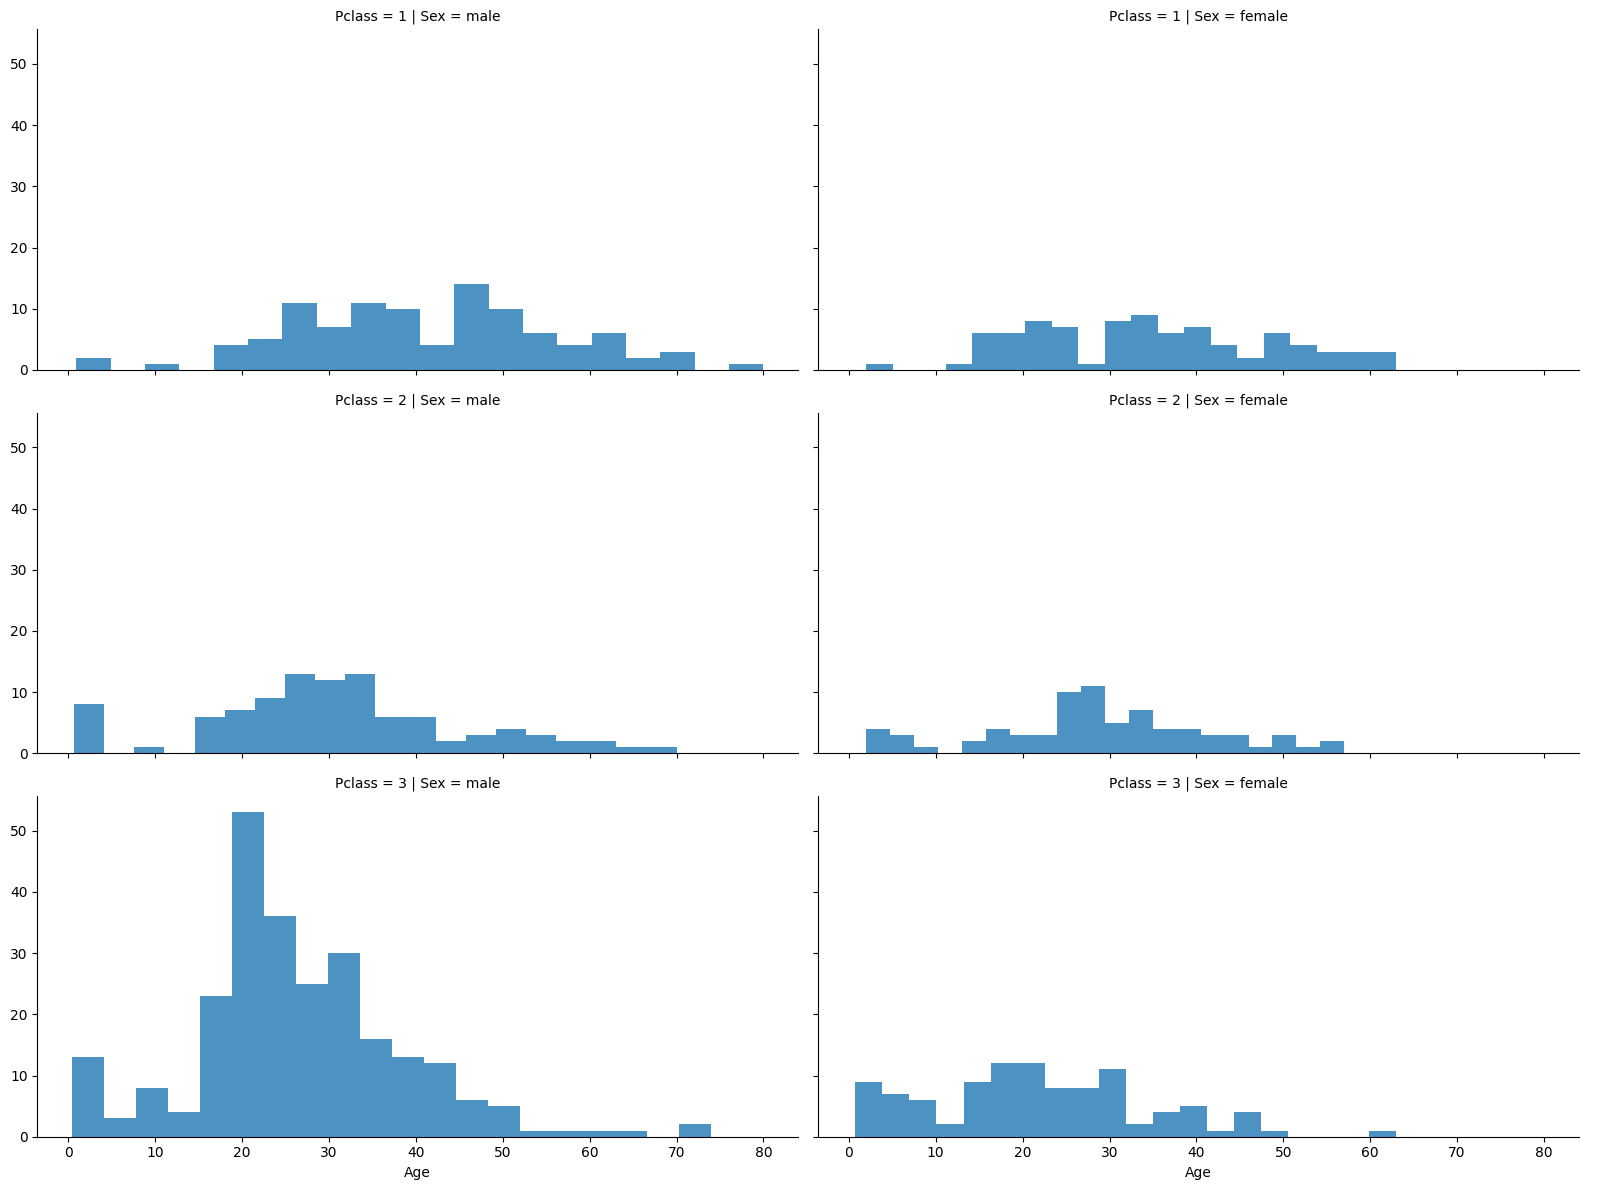

In [ ]:
grid = sns.FacetGrid(titanic, row = "Pclass", col = "Sex", height =4, aspect =2)
grid.map(plt.hist, 'Age', alpha = 0.8, bins =20)
grid.add_legend()
plt.show()

#1등실에서부터 일반실까지 등급이 낮아질수록 남성의 비율이 커지며, 3등실에는 남성이 많았으며 특히 20대 남성이 많았다


#나이별 승객 현황

In [ ]:
import plotly.express as px

fig =px.histogram(titanic, x = "Age")
fig.show()

# 선실 등급이 높으면 생존율이 높은것을 확인하는 그래프

#객실별 생존율을 연령별로 시각화

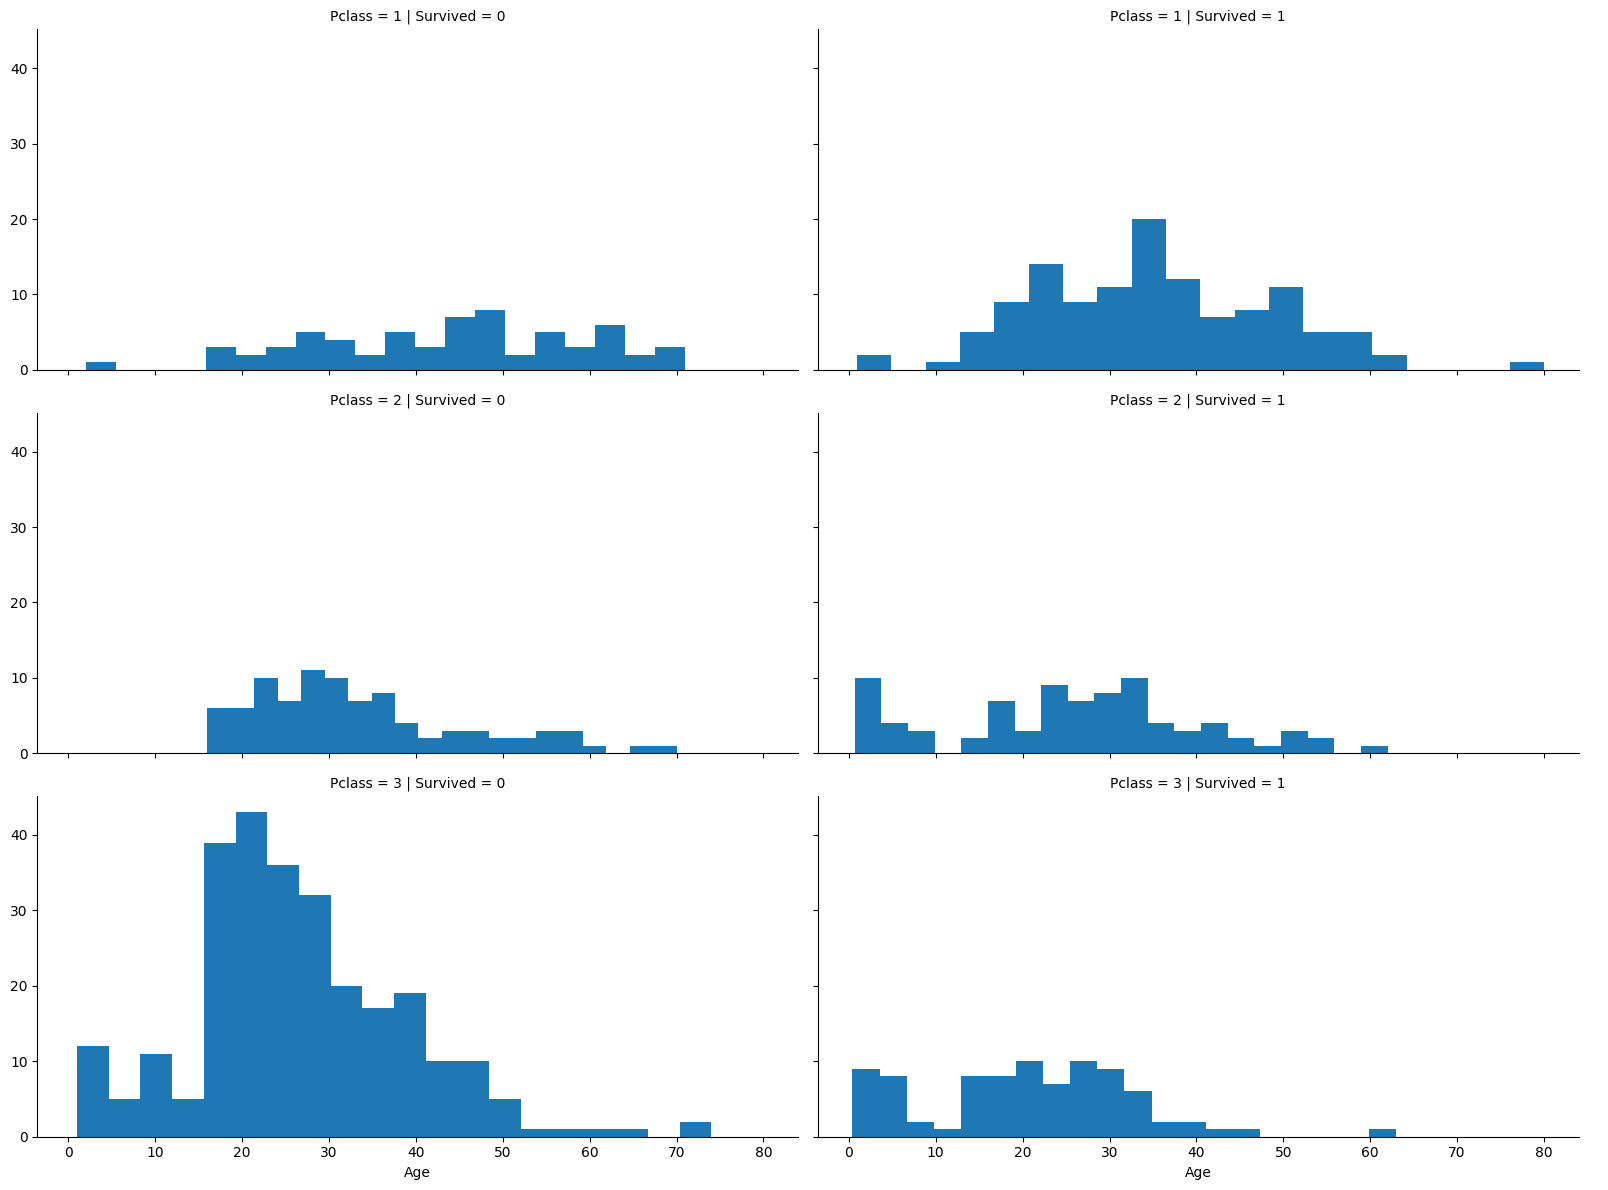

In [ ]:
grid = sns.FacetGrid(titanic, col = "Survived", row = "Pclass", height =4 , aspect =2)
grid.map(plt.hist, 'Age', alpha=1, bins =20)
grid.add_legend()
plt.show()

# 3등실의 경우 20~40대 정도의 사람들이 많이 사망한 것을 알 수 있다.

# 나이를 5단계로 그룹화 : baby(0~7), teen(8~15), young, adult, old(65~100)

# cut() : 수치형 변수를 특정 구간으로 나눈 범주형 레이블을 생성, 특정 구간들에 대한 그룹별 통계량을 구할 수 있다.

In [ ]:
titanic["Age_cat"] = dp.cut(titanic["Age"],bins = [0,7,15,30,60,100], include_lowest = True,
                            labels = ["Baby","Teen","Young","Adult","Old"])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


#나이, 성별, 객실등급별 생존자 수 파악

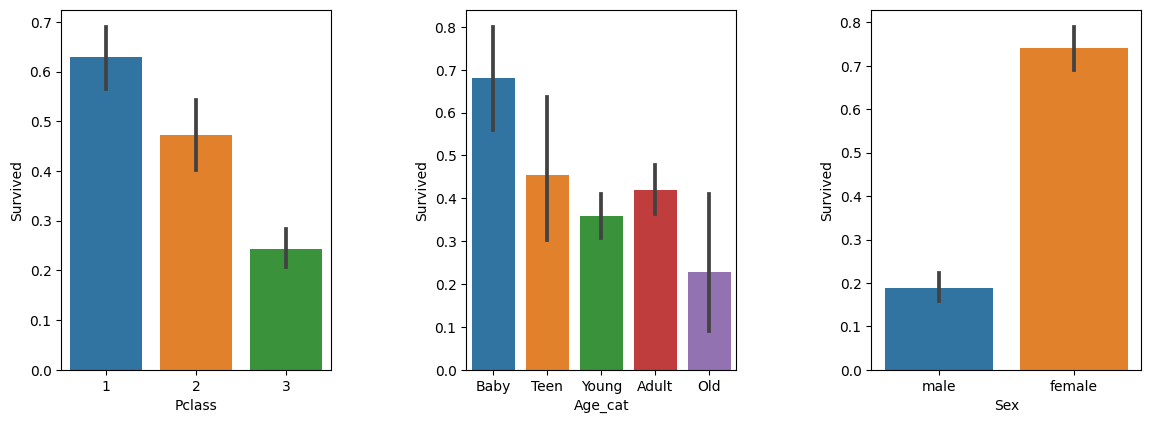

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(131)   #plt.subplot(nrow, ncol, index) ->  plt.subplot(1, 3 ,1) 1행 3열
sns.barplot(x= "Pclass",y="Survived", data = titanic)
plt.subplot(132)
sns.barplot(x = "Age_cat", y = "Survived", data = titanic)
plt.subplot(133)
sns.barplot(x = "Sex", y = "Survived", data = titanic)
plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.1, right =1, hspace = 0.5, wspace = 0.5)
plt.show()

In [ ]:
titanic

#남/ 여 나이별 생존 상황

Text(0.5, 1.0, 'Male')

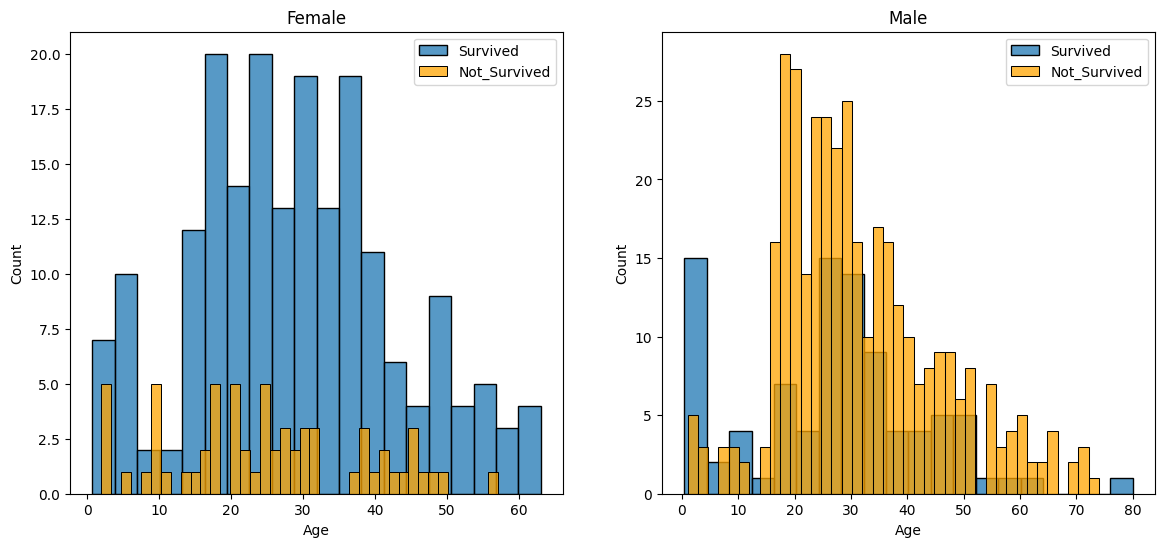

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (14,6))
women = titanic[titanic["Sex"] == "female"]
men = titanic[titanic["Sex"]=="male"]

ax = sns.histplot(women[women["Survived"]==1]["Age"],bins = 20,
                  label = "Survived", ax = axes[0], kde = False)

ax = sns.histplot(women[women["Survived"]==0]["Age"],bins = 40,
                  label = "Not_Survived", ax = axes[0], kde = False,
                  color = "orange")
ax.legend()
ax.set_title("Female")

ax = sns.histplot(men[men["Survived"]==1]["Age"],bins = 20,
                  label = "Survived", ax = axes[1], kde = False)

ax = sns.histplot(men[men["Survived"]==0]["Age"],bins = 40,
                  label = "Not_Survived", ax = axes[1], kde = False,
                  color = "orange")
ax.legend()
ax.set_title("Male")

#bins : 막대의 갯수
#ax : plot의 기존 축
#kde : 밀도 추정치 그래프 추가, 일(단)변량 데이터와 관련, default = False



# 탑승객의 이름에서 신분을 알 수 있다

# re : 정규표현식을 사용하기 위한 표준 라이브러리

# re.complie() : 정규표현 패턴의 컴파일
# re.match() : 문자열의 앞부분이 매치되는가를 체크
# re.search() : 선두에 한해서 매칭되는가를 체크
# re.fullmatch() : 문자열 전부가 매칭되는가를 체크
# re.finddall() : 매치된 부분 모두 리스트로 취득
# re.finditer() : 매치된 부분 모두 이터데이터로 취득
# re.sub(),re.subn() : 매치된 부분 치환
# re.split() : 정수표현 패턴으로 문자열 분할

In [ ]:
import re

#문자열을 스캔해서 정규식 패턴이 일치하는 첫 번째 위치를 찾는다
# * : 바로 앞 문자열 0개 이상 반복
# + : 바로 앞 문자열 1개 이상
# ? : 바로앞 문자열 0or 1개 반복
# \s : 공백 한개
# \w : 문자 or 숫자 한개
# \W : 문자 or 숫자가 아닌 것
# \d : 숫자 한개
# \D : 숫자가 아닌 문자 한 개
# . : 모든 문자 한 개
# ^ : 문자열 시작
# $ :문자열 끝
# - : 반복


#인식 타입


In [ ]:
title = []

for idx, dataset in titanic.iterrows():
  tmp = dataset["Name"]
  title.append(re.search("\,\s\w+(\s\w+)?\.",tmp).group()[2:-1])

titanic["Title"] = title
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr


#성별별로 귀족 분류

# crosstab() : 범주형 변수를 기준으로 갯수 파악이나 수치형 데이터를 넣어 계산할때 사용

In [ ]:
dp.crosstab(titanic["Title"], titanic["Sex"])

Sex,female,male
Title,,
Miss,186,0
Mr,0,517
Mrs,125,0
Rare_f,1,0
Rare_m,1,60
the Countess,1,0


# 신분 구분을 위한 데이터 처리

In [ ]:
titanic["Title"] = titanic["Title"].replace("Mlle","Miss")
titanic["Title"] = titanic["Title"].replace("Mme","Miss")
titanic["Title"] = titanic["Title"].replace("Ms","Miss")

In [ ]:
Rare_f = ["Dona", "Lady","the Countess"]
Rare_m = ["Capt","Col","Don","Major","Rev","Sir","Dr","Master","Jonkheer", ]
for each in Rare_f:
  titanic["Title"] = titanic["Title"].replace(each, "Rare_f")

for each in Rare_m:
  titanic["Title"] = titanic["Title"].replace(each, "Rare_m")

titanic["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare_m', 'Rare_f'], dtype=object)

# 신분에 따른 생존율

In [ ]:
titanic[["Title","Survived"]].groupby(["Title"],as_index = False).mean()

,Title,Survived
0,Miss,0.704301
1,Mr,0.156673
2,Mrs,0.792000
3,Rare_f,1.000000
4,Rare_m,0.475410


# 평민 남성의 생존율이 가장 낮고 , 귀족 남성이 다음으로 낮다
# 귀족 여성, 평민 여성이 높은 생존율을 보인다

#머신러닝을 이용한 생존자 예측
#데이터 구조 확인

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_cat      714 non-null    category
 13  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.7+ KB


# 사용할 컬럼을 새로운 데이터프레임 생성
# Pclass, Sex, Age, Sibs, Parch, Fare
# 머신러닝을 위해 해당 컬럼 숫자로 변경
# LabelEncode를 이용해 라벨 변경

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(titanic["Sex"])
titanic["Gender"] = le.transform(titanic["Sex"])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Title,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr,1


# 결측치 :
1. 대체값으로 대체
2. 결측치 삭제

In [ ]:
titanic = titanic[titanic["Age"].notnull()] #결측치 제거
titanic = titanic[titanic["Fare"].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Name         714 non-null    object  
 4   Sex          714 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        714 non-null    int64   
 7   Parch        714 non-null    int64   
 8   Ticket       714 non-null    object  
 9   Fare         714 non-null    float64 
 10  Cabin        185 non-null    object  
 11  Embarked     712 non-null    object  
 12  Age_cat      714 non-null    category
 13  Title        714 non-null    object  
 14  Gender       714 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 84.6+ KB


# 상관관계 확인 : 상관관계 히트맵에서는 대각행렬을 기준으로 위와 아래가 동일한 값을 갖게 된다. 자신과의 상관성을 나타내는 대각선의 1을 기준으로 아래와 위가 같다

<ipython-input-64-eda349791581>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



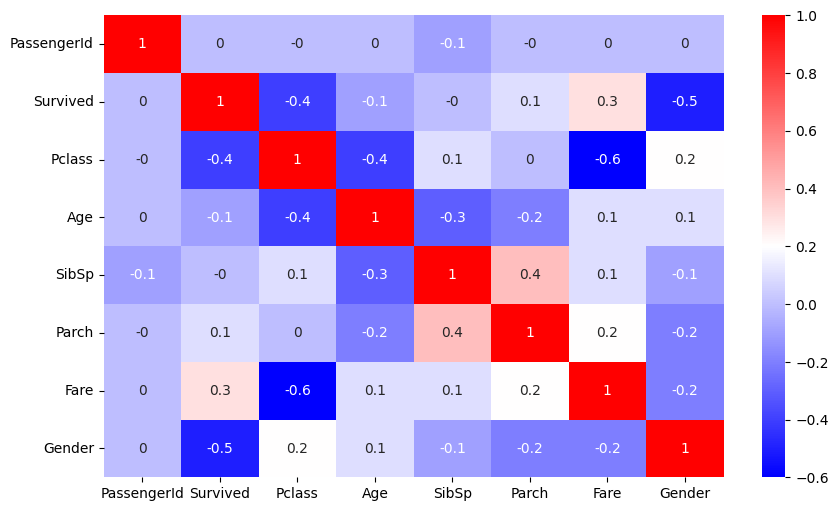

In [ ]:
correlation_matrix = titanic.corr().round(1)
plt.figure(figsize = (10,6))
sns.heatmap(data = correlation_matrix, annot = True, cmap = "bwr")
plt.show()


#데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

x = titanic[["Pclass","Age","SibSp","Parch","Fare","Gender"]]
y =titanic["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,
random_state =13)

# 모델: 의사결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth =4, random_state =13)
dt.fit(x_train.values, y_train)
pred=dt.predict(x_test.values)
print(accuracy_score(y_test,pred))

0.8181818181818182


# 조건을 주고 생존율 테스트

In [ ]:
import numpy as np

# Pclass = 3, age = 18, sibsp = 0, parch = 0, fare = 5, gender = 1

In [ ]:
people_m = np.array([[3,18,0,0,5,1]])
print("people_m:", dt.predict_proba(people_m)[0,1])

people_m: 0.14375


# Pclass = 1, age = 16, sibsp = 1, parch = 1, fare = 100, gender = 0

In [ ]:
people_m = np.array([[1,16,1,1,100,0]])
print("people_m:", dt.predict_proba(people_m)[0,1])

people_m: 0.9875
